###*Sayantan Mukherjee 60009220131 D2-2*

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [3]:
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10

# Resize all images to 224x224 for model compatibility
img_height, img_width = 32, 32
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow(x_train, y_train, batch_size=32)
test_data = test_datagen.flow(x_test, y_test, batch_size=32)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


###*Models*

In [4]:
def lenet5_model():
    model = keras.models.Sequential([
        layers.Conv2D(6, (5, 5), activation='relu', input_shape=(img_height, img_width, 3)),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, (5, 5), activation='relu'),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
def alexnet_model():
    model = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(img_height, img_width, 3)),
        layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'),
        layers.Conv2D(256, (5, 5), activation='relu', padding='same'),
        layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dense(4096, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [6]:
def vgg16_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model



In [8]:
def resnet50_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


###*Model Training*

In [10]:
all_models = {
    "LeNet-5": lenet5_model(),
    "AlexNet": alexnet_model(),
    "VGG-16": vgg16_model(),
    "ResNet-50": resnet50_model()
}

histories = {}
for model_name, model in all_models.items():
    print(f"Training {model_name}...")
    history = model.fit(train_data, validation_data=test_data, epochs=5, verbose=1)
    histories[model_name] = history


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training LeNet-5...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3085 - loss: 1.8766 - val_accuracy: 0.4702 - val_loss: 1.4620
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4824 - loss: 1.4520 - val_accuracy: 0.5105 - val_loss: 1.3702
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5350 - loss: 1.3081 - val_accuracy: 0.5513 - val_loss: 1.2659
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5657 - loss: 1.2180 - val_accuracy: 0.5522 - val_loss: 1.2523
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5864 - loss: 1.1557 - val_accuracy: 0.5655 - val_loss: 1.2415
Training AlexNet...
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.0995 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.0962 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/st

###*Compare and Visualize Results*

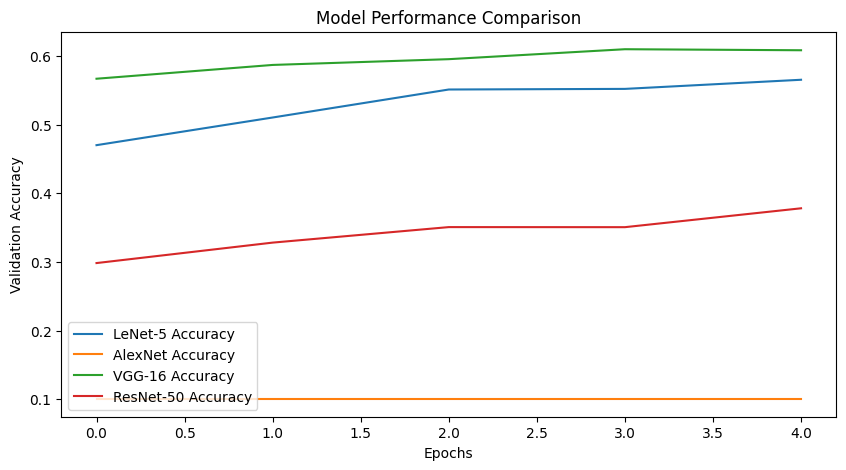

In [11]:
plt.figure(figsize=(10, 5))
for model_name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{model_name} Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Model Performance Comparison')
plt.show()
